In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
NxN = pd.read_csv('../extracted_data/NxN_imputed.csv', sep = ',', index_col = 0)

R2:  -0.5227416729008731
RMSE: 0.09677803061675465


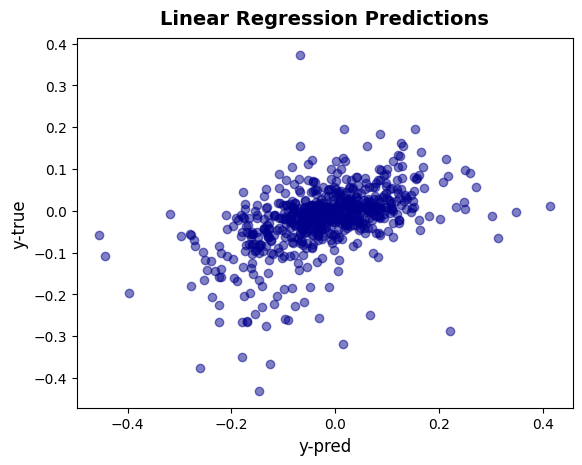

In [3]:
random.seed(41)

target_column = random.choice(NxN.columns)  # Randomly pick a column name

X = NxN.drop(columns=[target_column])  # Features (all columns except the target)
y = NxN[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.5365234603652977


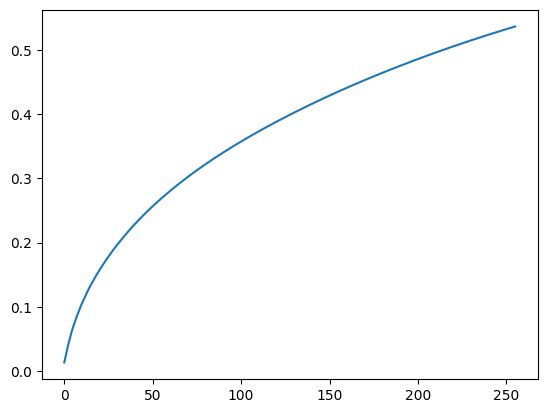

In [4]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [5]:
dims = 1024
NxN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
NxN_PCA

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.187138,0.211597,0.061275,0.219594,0.565746,-0.097486,0.390293,-0.209087,0.153385,0.252045,...,-0.015372,-0.018543,-0.001791,-0.030215,0.082354,0.000868,0.021902,-0.004800,-0.009253,-0.066688
1,-0.156250,0.264296,0.059612,0.021358,0.315826,-0.270250,0.160825,-0.124204,-0.173626,0.153402,...,-0.025799,0.000685,0.052897,0.024419,-0.026171,-0.066036,-0.042744,-0.037332,0.038339,0.034545
2,-0.169260,0.100492,0.115059,0.005163,0.167940,-0.360142,0.098566,-0.267276,-0.030267,0.206664,...,-0.000989,0.036830,-0.001116,-0.021325,0.045377,-0.040559,0.031420,0.021832,-0.034827,0.005960
3,-0.127099,0.108046,0.255501,0.158305,0.063343,-0.437281,0.258600,-0.436890,-0.241906,0.459582,...,0.001492,0.011861,-0.035164,-0.019920,-0.072985,0.039656,0.036055,0.016367,-0.012605,0.017850
4,0.009766,0.176995,0.105461,-0.074078,-0.025419,0.102904,0.157326,-0.070982,-0.103374,0.248919,...,0.007956,0.002768,-0.015899,-0.020397,-0.005531,0.006038,0.018232,0.016437,0.028604,0.024669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,0.415971,0.083612,-0.134990,0.274530,0.055291,-0.310872,0.271369,0.114469,-0.178505,0.037259,...,-0.001147,0.009928,-0.000898,0.000041,0.008784,-0.014302,-0.007153,-0.002757,0.019376,0.035314
3279,0.400448,0.262868,0.020432,0.362544,-0.060166,-0.199360,-0.015678,0.169710,-0.036357,-0.056786,...,0.012860,-0.027069,-0.038890,0.027523,-0.014395,-0.035366,0.017902,0.023011,-0.047822,-0.025054
3280,0.451473,0.068061,-0.018556,0.311310,-0.071116,-0.088027,0.036119,0.014894,-0.091050,0.020161,...,-0.013209,0.019808,0.019850,-0.036099,-0.048813,0.013546,0.055491,-0.040090,-0.042333,0.054139
3281,0.162806,0.208560,-0.010377,0.326376,-0.094967,-0.104264,-0.037299,0.123670,-0.117505,-0.091600,...,0.000292,-0.054939,0.016903,-0.032519,-0.003594,-0.015775,0.018096,-0.031154,-0.019438,0.002655


R2:  -0.007358960113468704
RMSE: 0.07871469018060713


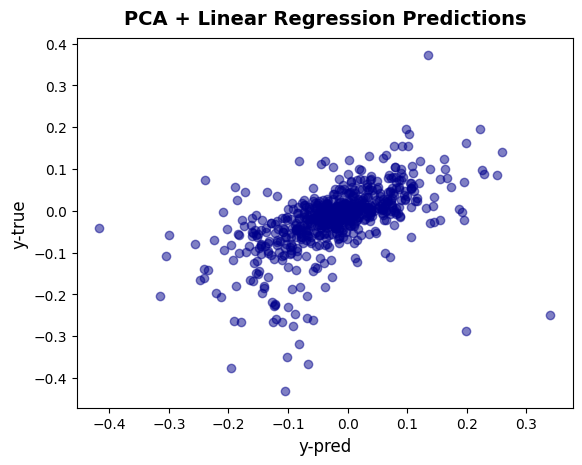

In [6]:
X_train, X_test, y_train, y_test = train_test_split(NxN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

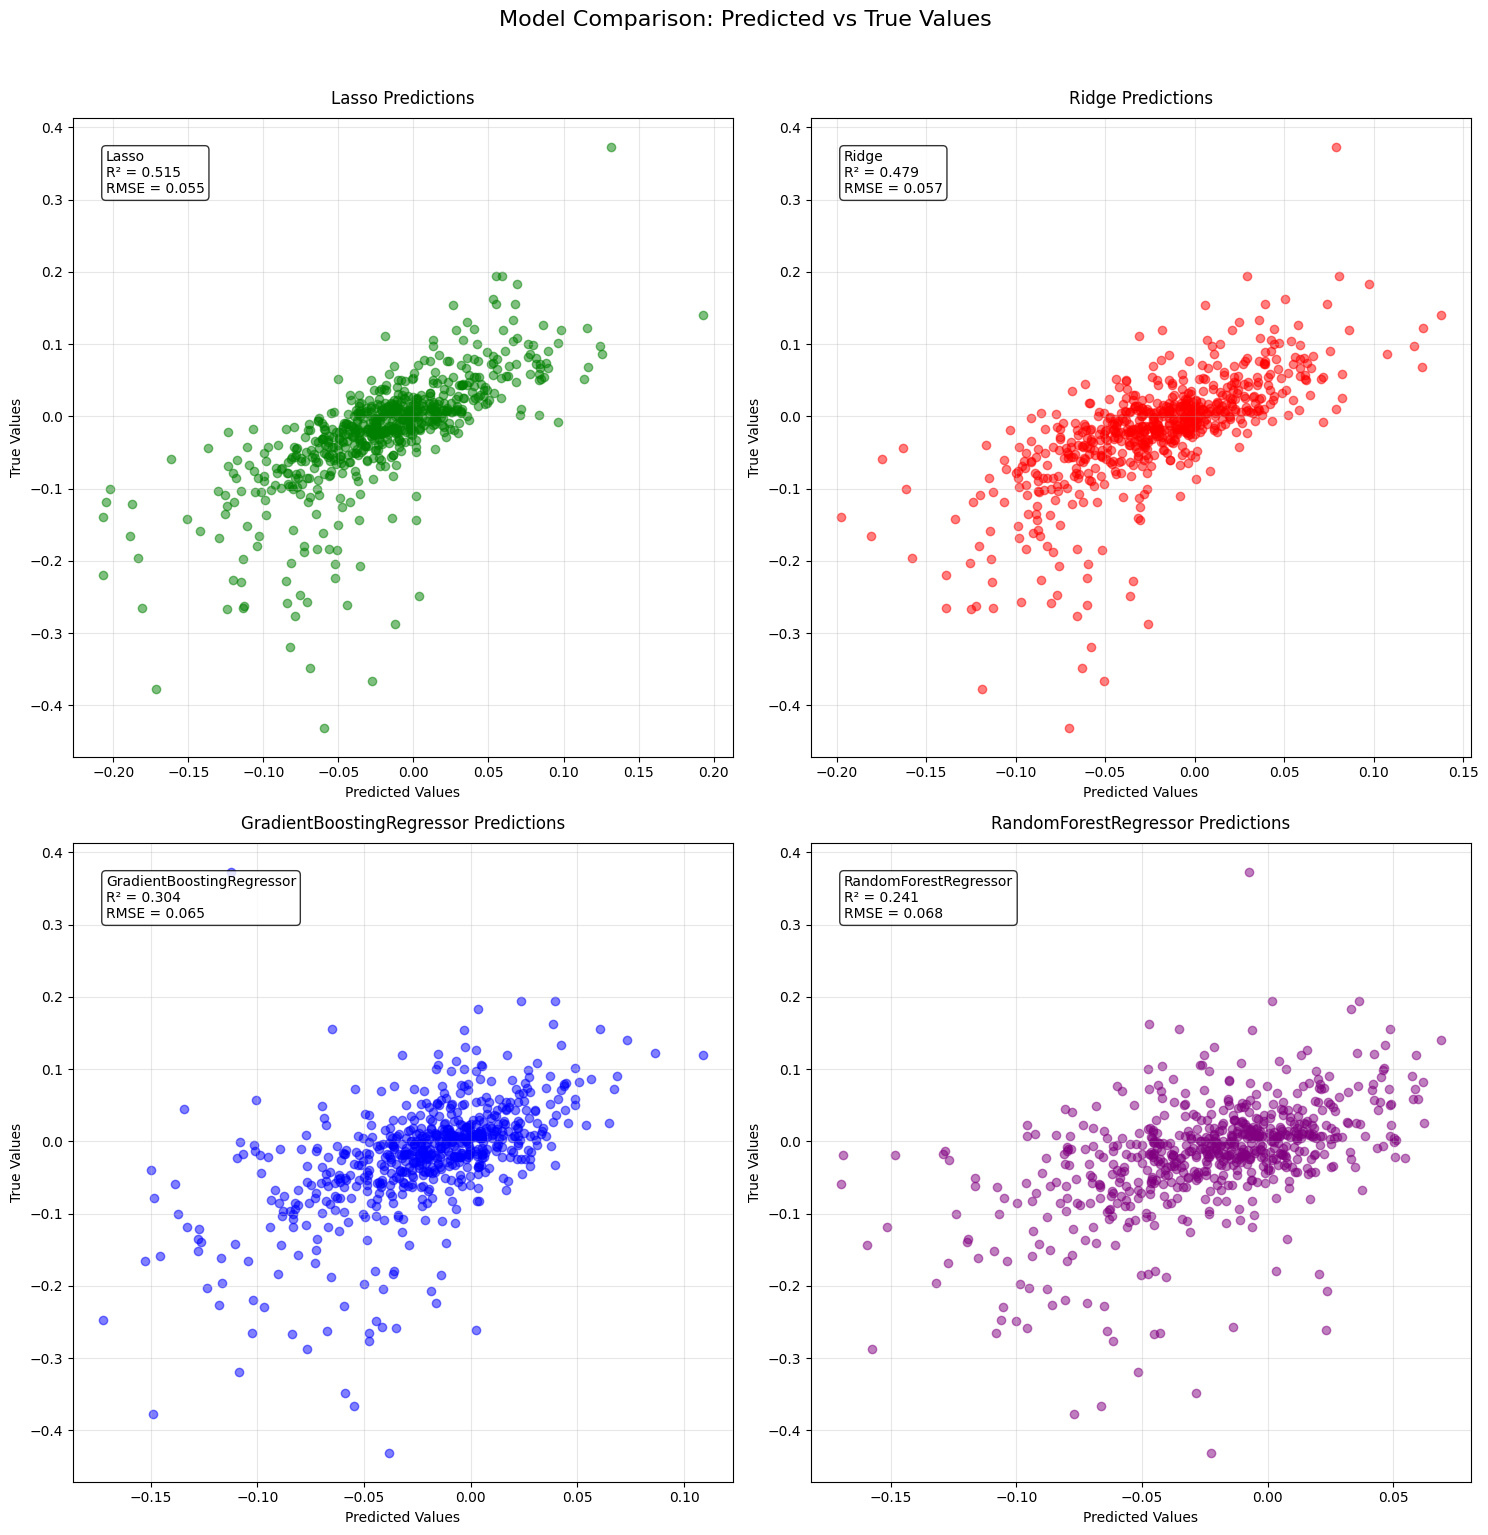

In [7]:
predictive_models = [ 
                      Lasso(alpha=0.0001), 
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42),

]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8873e-04 - mse: 8.8873e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3621e-04 - mse: 6.3621e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3140e-04 - mse: 3.3140e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2234e-04 - mse: 3.2234e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6122e-04 - mse: 4.6122e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1696e-04 - mse: 3.1696e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 9/50
66/66 ━━━━━━━

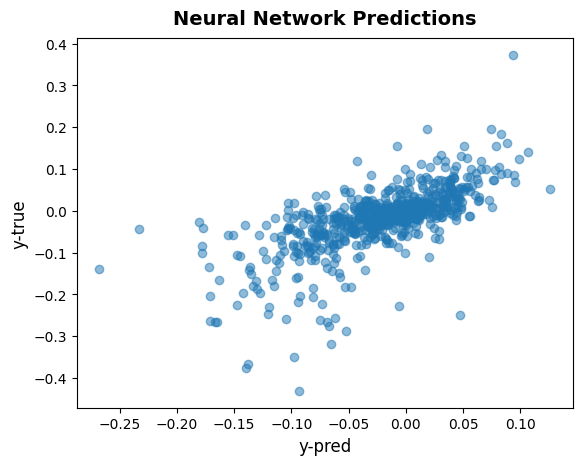

In [8]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()